In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

In [114]:
df = pd.read_csv('data/2019.csv')

In [7]:
#Part1 Data Cleaning 

In [11]:
df.head(n=6)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [12]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [93]:
df['Country or region'] = df['Country or region'].astype('category')


In [92]:
df.dtypes

Country or region            int16
Score                      float64
GDP per capita             float64
Social support             float64
Healthy life expectancy    float64
dtype: object

In [16]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [91]:
df.shape

(156, 5)

In [291]:
df.describe()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,GDP_Social,GDP_Health,Social_Health
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,77.500000,5.407096,0.905147,1.208814,0.725244,1.183559,0.736524,0.928437
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.657868,0.461999,0.439906
min,0.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.750000,4.544500,0.602750,1.055750,0.547750,0.586951,0.331899,0.559279
50%,77.500000,5.379500,0.960000,1.271500,0.789000,1.198514,0.761707,1.022292
75%,116.250000,6.184500,1.232500,1.452500,0.881750,1.741029,1.085285,1.260008
max,155.000000,7.769000,1.684000,1.624000,1.141000,2.379711,1.793652,1.669283


<Axes: ylabel='Frequency'>

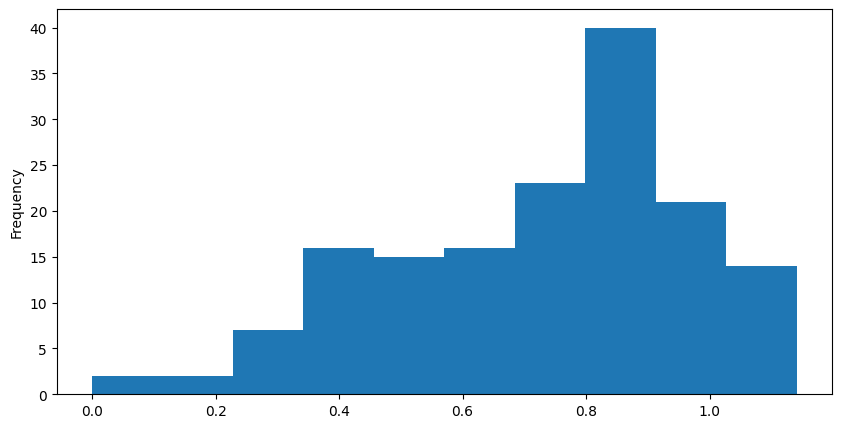

In [282]:
#Plot histogram of target/dependant variable(Healthy life expectancy) to see distribution.
plt.figure(figsize = (10,5))
df['Healthy life expectancy'].plot(kind ='hist')

In [292]:
print(df.columns)

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'GDP_Social', 'GDP_Health', 'Social_Health'],
      dtype='object')


In [293]:
df['Country or region'] = df['Country or region'].astype('category').cat.codes



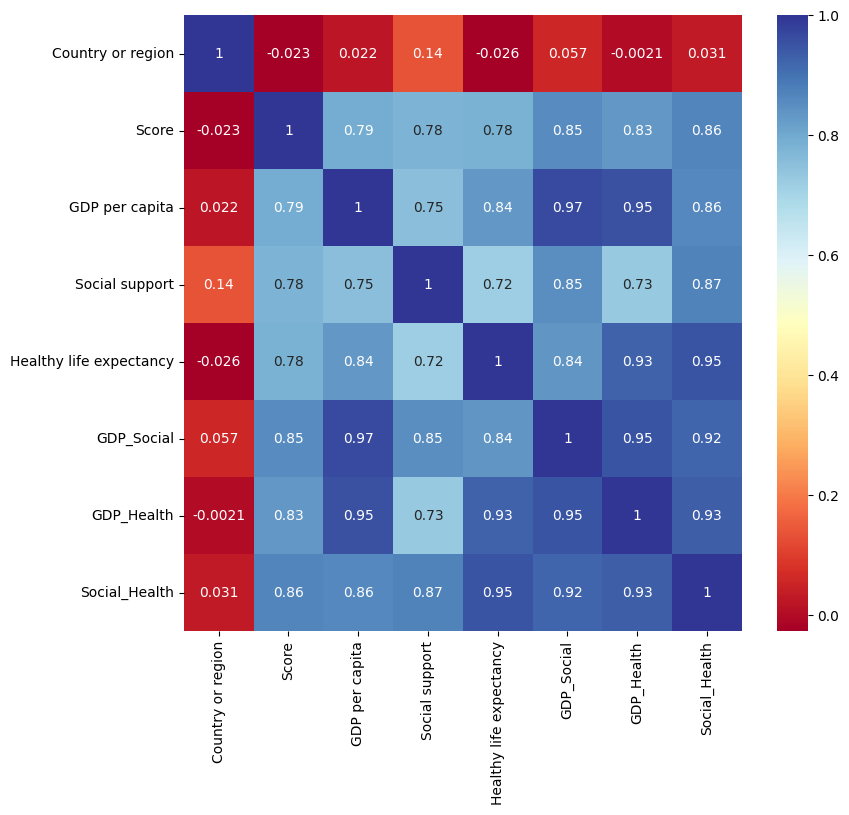

In [285]:
#Using Pearson Correlation (corr() function) plot all correlation (0.5-1)
plt.figure(figsize=(9,8))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.RdYlBu)
plt.show()


In [312]:
df.columns = df.columns.str.strip()  # Remove extra spaces
print(df.columns)  # Verify correct names


Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'GDP_Social', 'GDP_Health', 'Social_Health'],
      dtype='object')


In [313]:
#Identify positive correlations with target variable
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy','Healthy life expectancy', 'GDP_Social', 'GDP_Health', 'Social_Health','GDP_Social', 'GDP_Health'
        ]]
y = df['Score'] 

In [314]:
df.dtypes

Country or region            int16
Score                      float64
GDP per capita             float64
Social support             float64
Healthy life expectancy    float64
GDP_Social                 float64
GDP_Health                 float64
Social_Health              float64
dtype: object

In [315]:
df

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,GDP_Social,GDP_Health,Social_Health
0,43,7.769,1.340,1.587,0.986,2.126580,1.321240,1.564782
1,36,7.600,1.383,1.573,0.996,2.175459,1.377468,1.566708
2,105,7.554,1.488,1.582,1.028,2.354016,1.529664,1.626296
3,57,7.494,1.380,1.624,1.026,2.241120,1.415880,1.666224
4,98,7.488,1.396,1.522,0.999,2.124712,1.394604,1.520478
...,...,...,...,...,...,...,...,...
151,117,3.334,0.359,0.711,0.614,0.255249,0.220426,0.436554
152,137,3.231,0.476,0.885,0.499,0.421260,0.237524,0.441615
153,0,3.203,0.350,0.517,0.361,0.180950,0.126350,0.186637
154,24,3.083,0.026,0.000,0.105,0.000000,0.002730,0.000000


In [316]:
#Split the date into 75% training set and 25% testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [317]:
# Print shapes of the splits
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (117, 9) (117,)
Test Set Shape: (39, 9) (39,)


In [318]:
#117 countries in train and 39 in test set

In [319]:
#Fit the linear regression model
# Initialize and train the Linear Regression model
# Predict happiness scores using the test data
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(X_train, y_train)
lrm_predictions = lrm.predict(X_test)

In [320]:
lrm_predictions

array([6.21069024, 5.90814856, 5.8158248 , 5.81680234, 4.2443664 ,
       6.8086117 , 5.20204129, 5.58343536, 5.63532671, 4.18304863,
       6.50070868, 5.44425406, 7.04013187, 4.68622019, 6.40064579,
       6.27096121, 4.14843151, 3.62222675, 4.20633467, 5.88742976,
       4.03592317, 6.43929091, 6.64236995, 6.74836379, 5.94301769,
       4.60697481, 5.23496173, 5.97194482, 5.95435857, 4.23762445,
       5.3138743 , 4.93590787, 5.9276812 , 3.72653745, 4.87510961,
       3.93398987, 4.24194341, 4.32261899, 5.93707119])

In [321]:
#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lrm_predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.37871374325216245


In [322]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6153972239555217


In [323]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [324]:
#Measures how well features explain the target variable.
#Ranges from 0 to 1 → Higher = Better.
#r2 = r2_score(y_test, lrm_predictions)


# Make predictions
lrm_predictions = lrm.predict(X_test)

# Compute R-squared
r2 = r2_score(y_test, lrm_predictions)

# Print R-squared value
print("R-squared (R²):", r2)
#from sklearn.metrics import mean_squared_error, r2_score

R-squared (R²): 0.6201667650896423


Text(0, 0.5, 'Predicted Happiness Score')

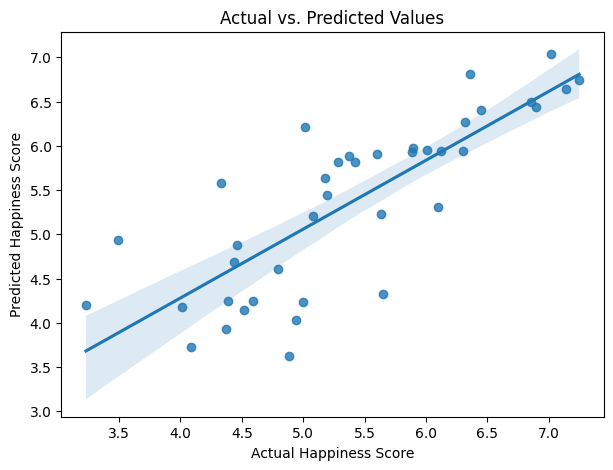

In [325]:
plt.figure(figsize=(7,5))
sns.regplot(x=y_test, y=lrm_predictions, )
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')



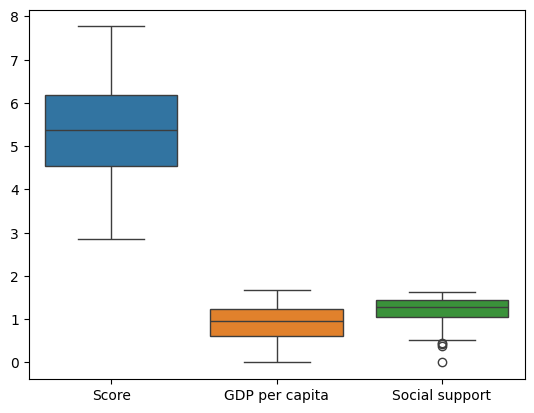

In [328]:
sns.boxplot(data=df[['Score', 'GDP per capita', 'Social support']])
plt.show()
#GDP per capita is fairly normally distributed.
#Most countries have social support between ~1.0 and ~2.0.

In [306]:
#Residuals = Actual - Predicted

Text(0, 0.5, 'Frequency')

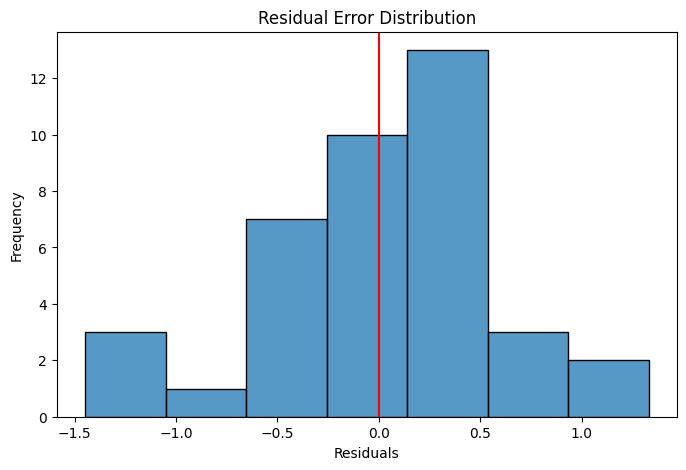

In [326]:

residuals = y_test - lrm_predictions

# Plot residual distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals)
plt.axvline(0, color='red')
plt.title('Residual Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')




In [ ]:
#Model is correctly capturing the positive correlation between the independent variables and the happiness score.

In [327]:
print('Healthy life expectancy', lrm_model.score(X_test, y_test))

Healthy life expectancy 0.6201667650896423


In [ ]:
#Metric	What It Means
#MSE	Measures average squared errors, lower is better.
#RMSE	Helps interpret error in actual units, lower is better.
#R²	How well the model explains happiness scores, closer to 1 is better.

In [ ]:
#Happiness might depend on combinations of factors (e.g., GDP × Social Support)???